In [4]:
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from lib.scene import Scene, GaussianModel
from lib.arguments import load_config
from lib.gaussian_renderer import render
from lib.utils.loss_utils import compute_full_loss_map

# MODIFICATIONS
OPTIMIZATION_STEPS = 50
TRIN_CAMERA_IDX = 1

# SETTINGS
ARGUMENTS = [
    ("-s", "/home/borth/2d-gaussian-splatting/data/DTU/scan105"),
    ("-m", "/home/borth/2d-gaussian-splatting/logs/2025-02-12/11-11-03"),
    ("-r", "2"),
    ("--depth_ratio", "1")
]

dataset, opt, pipe = load_config(ARGUMENTS)
gaussians = GaussianModel(dataset.sh_degree)
scene = Scene(dataset, gaussians, load_iteration=-1)
# scene = Scene(dataset, gaussians)
camera = scene.getTrainCameras()


Loading trained model at iteration 500
Reading camera 64/64
Loading Training Cameras
Loading Test Cameras


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.80225325..0.95050013].


dict_keys(['render', 'viewspace_points', 'visibility_filter', 'radii', 'rend_alpha', 'rend_normal', 'rend_dist', 'surf_depth', 'surf_normal'])


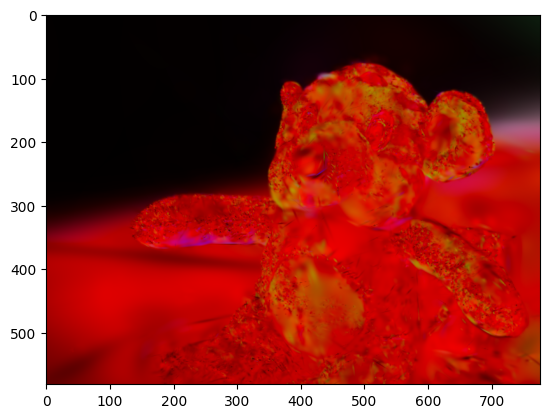

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9998957..0.99986225].


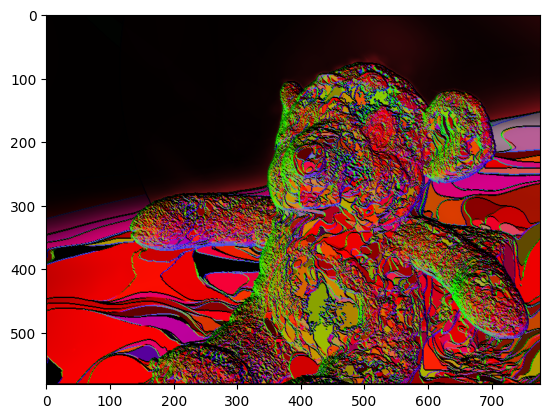

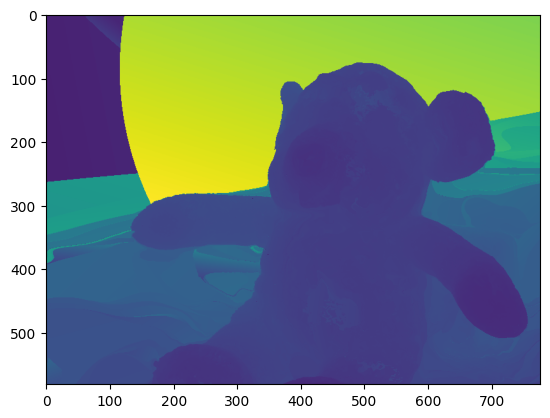

In [5]:
from lib.gaussian_renderer import render, render_wrapper
import torch

pipe.depth_ratio = 1.0
bg_color = [1, 1, 1] if dataset.white_background else [0, 0, 0]
background = torch.tensor(bg_color, dtype=torch.float32, device="cuda")
out = render(viewpoint_camera=camera[8], pc=gaussians, pipe=pipe, bg_color=background)
print(out.keys())
image = out["rend_normal"].permute(1,2,0).detach().cpu().numpy()
plt.imshow(image)
plt.show()
image = out["surf_normal"].permute(1,2,0).detach().cpu().numpy()
plt.imshow(image)
plt.show()
image = out["surf_depth"].permute(1,2,0).detach().cpu().numpy()
plt.imshow(image)
plt.show()

In [ ]:
pipe.depth_ratio

In [ ]:
image = out["surf_depth"].permute(1,2,0).detach().cpu().numpy()
plt.imshow(image)
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Visualize the GT image
gt_image = camera[0].original_image
plt.imshow(gt_image.permute(1,2,0).cpu().numpy())
plt.show()

# Visualize the GT image
alpha_mask = camera[0].gt_alpha_mask
plt.imshow(alpha_mask.permute(1,2,0).cpu().numpy())
plt.show()